**e-Numpy (Kelompok 6)**
* Ilham Taufiqurrohim
* Muhammad Chosasih Mahendra
* Putri Maylita
* Rama Putra
* Samuel Akwila



# EDA

In [3]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12

pd.set_option('display.max_columns',None)

In [5]:
#Baca dataset

df = pd.read_csv('/content/drive/MyDrive/flight.csv')
df.columns = map(str.lower, df.columns)
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7.0,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0


## Data Understanding

In [6]:
#Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14021 entries, 0 to 14020
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          14021 non-null  int64  
 1   ffp_date           14021 non-null  object 
 2   first_flight_date  14021 non-null  object 
 3   gender             14020 non-null  object 
 4   ffp_tier           14021 non-null  int64  
 5   work_city          13562 non-null  object 
 6   work_province      13382 non-null  object 
 7   work_country       14017 non-null  object 
 8   age                13952 non-null  float64
 9   load_time          14021 non-null  object 
 10  flight_count       14021 non-null  int64  
 11  bp_sum             14021 non-null  int64  
 12  sum_yr_1           14018 non-null  float64
 13  sum_yr_2           14021 non-null  float64
 14  seg_km_sum         14021 non-null  int64  
 15  last_flight_date   14021 non-null  object 
 16  last_to_end        140

In [7]:
df.duplicated().sum()

0

Pengamatan:
* Feature **`ffp_date, first_flight_date, load_time, dan last_flight_date `**seharusnya merupakan tipe data datetime karena keempat feature tersebut berisi tanggal
* Feature age sebaiknya dalam bentuk integer
* Feature **`gender, work_city, work_province, work_country, age, sum_yr_1, sum_yr_2`** memiliki data yang hilang
* Tidak ada data yang duplikat

In [8]:
#Memastikan jumlah data yang hilang
df_clean = df.copy()

data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,work_province,639,4.557
1,work_city,459,3.274
2,age,69,0.492
3,work_country,4,0.029
4,sum_yr_1,3,0.021
5,point_notflight,1,0.007
6,points_sum,1,0.007
7,gender,1,0.007
8,avg_discount,1,0.007
9,exchange_count,1,0.007


In [9]:
col_missing_value = data_missing_value['feature'].tolist() 
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14021 entries, 0 to 14020
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_province    13382 non-null  object 
 1   work_city        13562 non-null  object 
 2   age              13952 non-null  float64
 3   work_country     14017 non-null  object 
 4   sum_yr_1         14018 non-null  float64
 5   point_notflight  14020 non-null  float64
 6   points_sum       14020 non-null  float64
 7   gender           14020 non-null  object 
 8   avg_discount     14020 non-null  float64
 9   exchange_count   14020 non-null  float64
 10  max_interval     14020 non-null  float64
 11  avg_interval     14020 non-null  float64
 12  last_to_end      14020 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.4+ MB


## Handling Missing Value

In [10]:
#Handle Missing Value

df_clean['work_city'].fillna(df_clean['work_city'].mode()[0], inplace=True)
df_clean['work_province'].fillna(df_clean['work_province'].mode()[0], inplace=True)
df_clean['work_country'].fillna(df_clean['work_country'].mode()[0], inplace=True)
df_clean['gender'] = df_clean['gender'].fillna('Male')

#Handle Missing Value 2
miss = ['age', 'sum_yr_1','last_to_end', 'avg_interval', 'max_interval',
        'exchange_count', 'avg_discount', 'points_sum', 'point_notflight', 'sum_yr_2']
for i in miss:
  df_clean[miss] = df_clean[miss].fillna(df_clean[miss].mean())


In [11]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,member_no,0
1,ffp_date,0
2,first_flight_date,0
3,gender,0
4,ffp_tier,0
5,work_city,0
6,work_province,0
7,work_country,0
8,age,0
9,load_time,0


Pengamatan:

* Pada feature **`work_city, work_province, work_country`** menggunakan nilai modus untuk setiap baris yang hilang, karena data yang hilang cukup banyak.

* Pada feature **`gender`** juga menggunakan nilai modus.

* Pada feature lainnya, data yang kosong diisi dengan nilai mean.

## Fix Datatype

In [12]:
#Memperbaiki Tipe Data
df_clean['age'] = df_clean['age'].astype(int)

In [13]:
#Memperbaiki Data tipe datetime

date_col = ['ffp_date', 'first_flight_date', 'load_time','last_flight_date']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

df_clean['last_flight_date'] = df_clean['last_flight_date'].fillna(df_clean['last_flight_date'].mean())

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14021 entries, 0 to 14020
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          14021 non-null  int64         
 1   ffp_date           14021 non-null  datetime64[ns]
 2   first_flight_date  14021 non-null  datetime64[ns]
 3   gender             14021 non-null  object        
 4   ffp_tier           14021 non-null  int64         
 5   work_city          14021 non-null  object        
 6   work_province      14021 non-null  object        
 7   work_country       14021 non-null  object        
 8   age                14021 non-null  int64         
 9   load_time          14021 non-null  datetime64[ns]
 10  flight_count       14021 non-null  int64         
 11  bp_sum             14021 non-null  int64         
 12  sum_yr_1           14021 non-null  float64       
 13  sum_yr_2           14021 non-null  float64       
 14  seg_km

## Categorical and Numerical Data

In [15]:
#Melihat statistical summary numeric data
df.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,14021.000000,14021.000000,13952.000000,14021.000000,14021.000000,14018.000000,14021.000000,14021.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,31323.849511,4.378932,44.273079,29.979388,31434.265388,14415.264160,15935.510591,45694.453605,58.731669,29.213208,128.159629,1.064265,0.791839,35561.488588,5.157917
std,18194.518213,0.638055,9.477541,19.402562,24683.222433,12659.288739,13227.281272,28105.414013,85.983932,23.926935,71.166834,2.036108,0.187757,31229.981150,10.114744
min,2.000000,4.000000,12.000000,2.000000,413.000000,0.000000,0.000000,11424.000000,1.000000,2.000000,4.000000,0.000000,0.353298,413.000000,0.000000
25%,15301.000000,4.000000,37.000000,18.000000,17870.000000,7084.250000,8065.000000,28420.000000,9.000000,17.000000,79.000000,0.000000,0.681148,18828.750000,0.000000
50%,31157.000000,4.000000,43.000000,25.000000,23845.000000,11539.000000,12781.000000,37474.000000,25.000000,24.408249,113.000000,0.000000,0.750000,25771.500000,1.000000
75%,47175.000000,5.000000,50.000000,37.000000,35758.000000,17979.250000,19688.000000,53230.000000,74.000000,34.054180,159.000000,2.000000,0.833860,40169.250000,5.000000
max,62988.000000,6.000000,89.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,696.000000,622.000000,622.000000,46.000000,1.500000,795398.000000,140.000000


In [16]:
#Melihat statistical summary categorical data
df.describe(include='object')

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
count,14021,14021,14020,13562,13382,14017,14021,14021
unique,2961,3037,2,1227,460,55,1,517
top,9/9/2005,9/9/2005,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,35,28,11538,2971,4821,12764,14021,530


Pengamatan:
* Terdapat feature yang memiliki hanya satu unique value yaitu **`load_time`**
* Terdapat feature yang berisi informasi ID unique customer.

In [17]:
#Memisahkan kolom numeric dan categorical
numerical = df_clean.loc[:, (df_clean.dtypes == int) | (df_clean.dtypes == float)].columns.tolist()
categorical = df_clean.loc[:, (df_clean.dtypes != int) & (df_clean.dtypes != float) & (df_clean.columns != 'publish_daytype') & ((df_clean.columns != 'trending_daytype'))].columns.tolist()

In [18]:
#Melihat data categorical
df_clean[categorical].head()

,ffp_date,first_flight_date,gender,work_city,work_province,work_country,load_time,last_flight_date
0,2006-11-02,2008-12-24,Male,.,beijing,CN,2014-03-31,2014-03-31
1,2007-02-19,2007-08-03,Male,guangzhou,beijing,CN,2014-03-31,2014-03-25
2,2007-02-01,2007-08-30,Male,.,beijing,CN,2014-03-31,2014-03-21
3,2008-08-22,2008-08-23,Male,Los Angeles,CA,US,2014-03-31,2013-12-26
4,2009-04-10,2009-04-15,Male,guiyang,guizhou,CN,2014-03-31,2014-03-27


In [19]:
df_clean[categorical].shape

(14021, 8)

In [20]:
# #Visualisasi data categorical menggunakan countplot
# plt.figure(figsize=(15, 15))
# for i in range(0, len(categorical)):
#     plt.subplot(2, 4, i+1)
#     sns.countplot(x=df_clean[categorical[i]])
#     plt.tight_layout()

Pengamatan:
* Kolom categorical memiliki banyak sekali unique value, sehingga sulit untuk diberikan visualisasi.
* Member paling banyak adalah laki-laki.
* Mayoritas feature memiliki unique value yang besar.
* Feature **`load_time`** hanya memiliki satu nilai yaitu 2014-03-31/

In [21]:
#Melihat data numerical
df_clean[numerical].head()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,6,31,210,505308,239560.0,234188.0,580717,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,6,42,140,362480,171483.0,167434.0,293678,7.0,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,6,40,135,351159,163618.0,164982.0,283712,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,5,64,23,337314,116350.0,125500.0,281336,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,6,48,152,273844,124560.0,130702.0,309928,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0


In [22]:
df_clean[numerical].shape

(14021, 15)

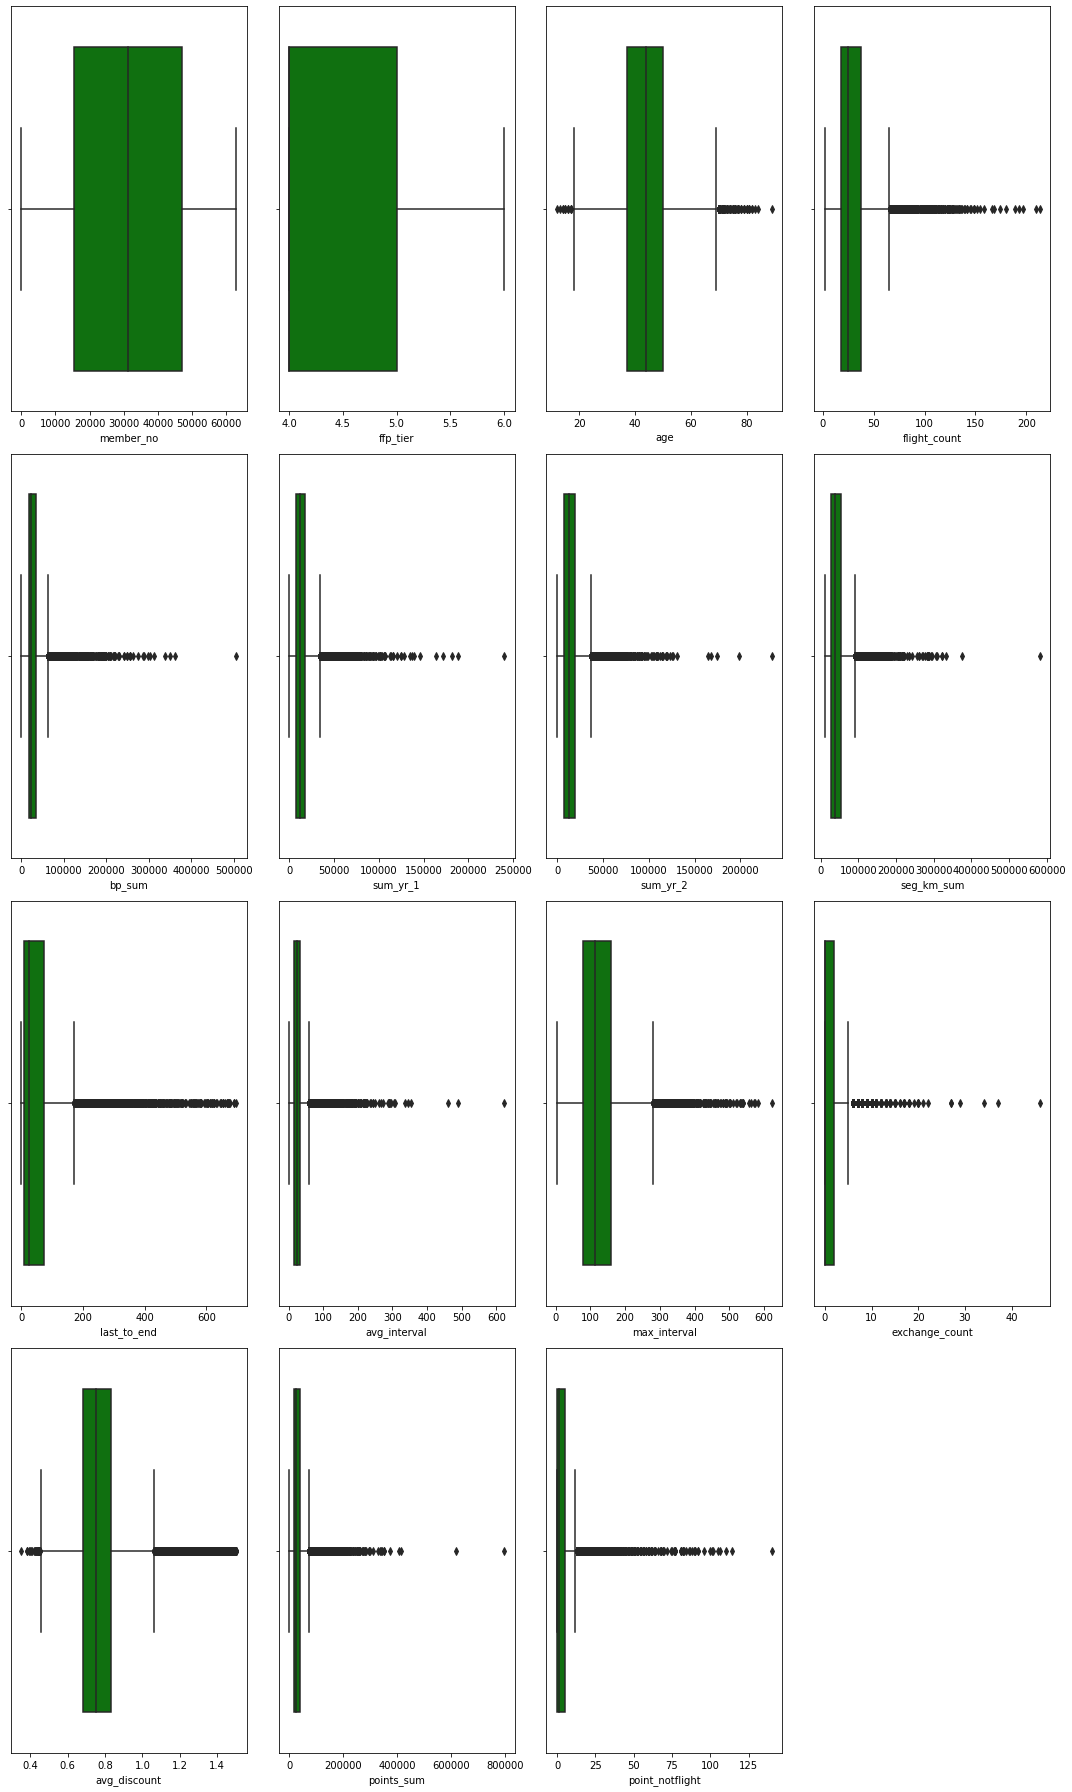

In [23]:
#Visualisasi data categorical menggunakan boxplot
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df_clean[numerical[i]], color='green')
    plt.tight_layout()

plt.show()

Pengamatan:

Mayoritas feature memiliki outlier kecuali feature **`member_no`** dan **`ffp_tier.`**

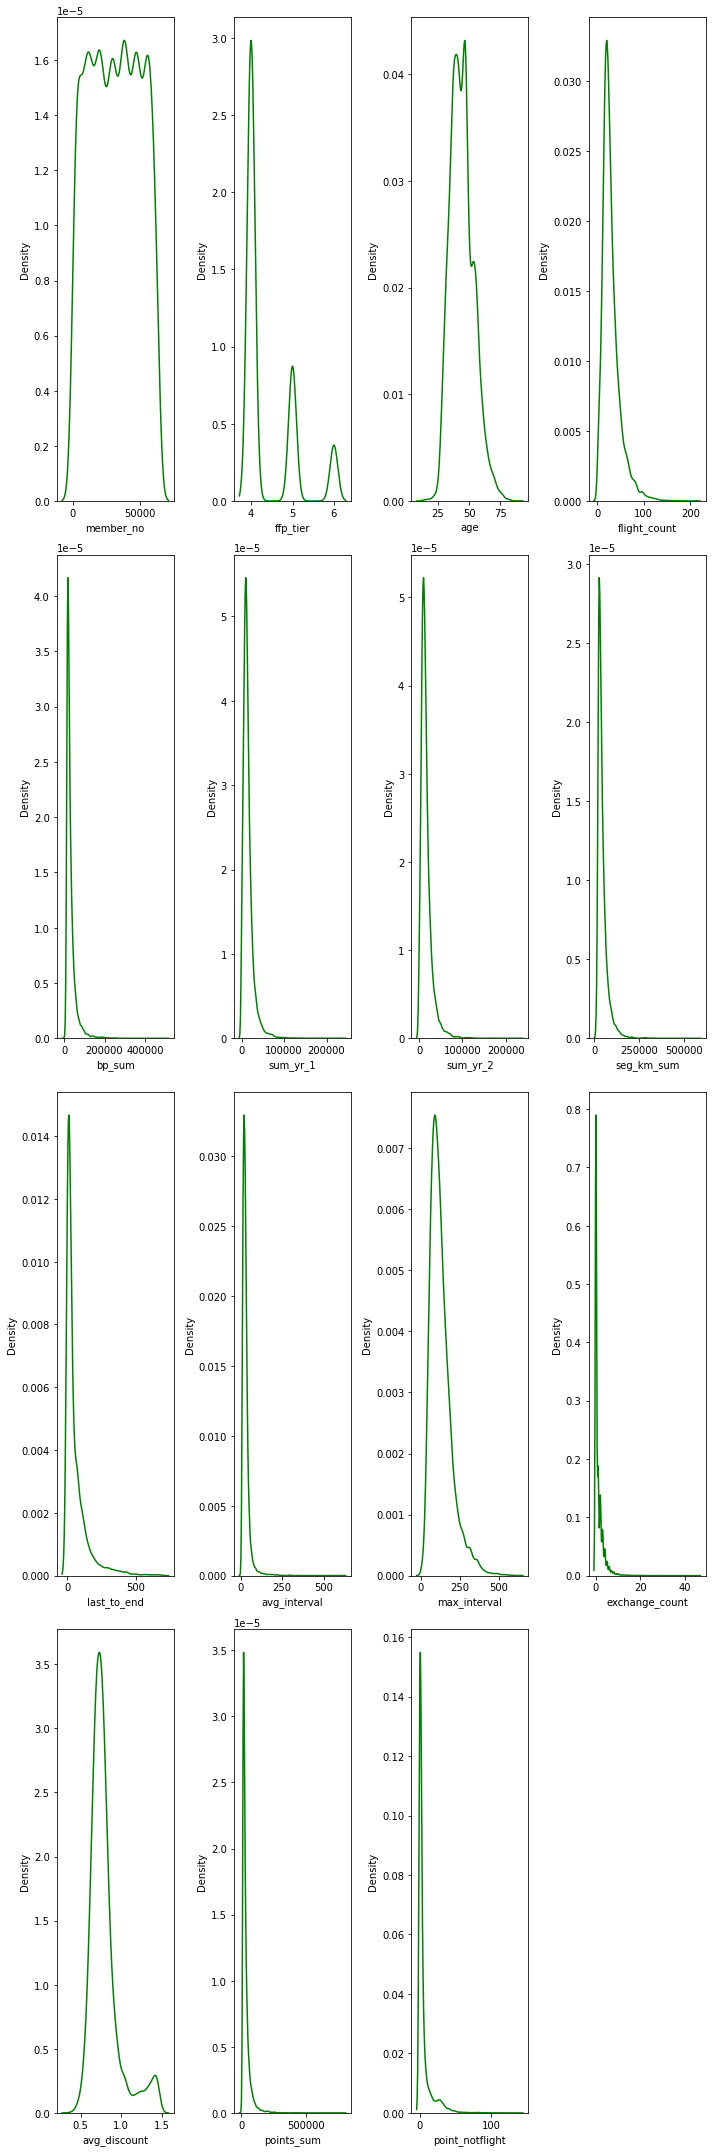

In [24]:
#Visualisasi data numerical menggunakan distribusi plot
plt.figure(figsize=(10, 30))
for i in range(0, len(numerical)):
    plt.subplot(4, 4,i+1)
    sns.kdeplot(df_clean[numerical[i]], color='green')
    plt.tight_layout()

Pengamatan:

Mayoritas feature memiliki distribusi skew positif kecuali **`member_no, ffp_tier`** dan **`avg_discount`**

# Feature Engineering

**Dalam project ini, kita menggunakan klustering dengan analisis RFM (Recency, Frequency, and Monetary)**

In [25]:
df_clean.head(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7.0,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0


## Selecting Columns

In [26]:
# Lamanya member = hari data diambil - hari pertama menjadi member

df_clean['member_time'] = (df_clean['load_time'] - df_clean['ffp_date']).dt.days
df_clean.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,member_time
4002,61256,2013-01-26,2013-01-26,Male,5,dalianshi,liaoning,CN,40,2014-03-31,51,29617,0.0,28404.0,55690,2014-03-21 00:00:00.000000000,11.0,8.400000,50.0,0.0,0.689898,37962.0,9.0,429
1279,17635,2006-01-26,2006-01-28,Male,5,shenyangshi,liaoning,CN,38,2014-03-31,63,56277,29403.0,21796.0,80675,2014-02-14 00:00:00.000000000,47.0,10.822581,45.0,0.0,0.791294,59398.0,2.0,2986
5384,48502,2009-02-22,2009-02-22,Male,5,shanghai,shanghai,CN,47,2014-03-31,37,24492,7049.0,9239.0,49019,2014-03-29 00:00:00.000000000,3.0,20.055556,266.0,1.0,0.667134,24492.0,4.0,1863
8759,20418,2005-09-26,2005-11-11,Male,4,dongguan,guangdong,CN,60,2014-03-31,23,15718,12259.0,9355.0,36547,2014-02-28 00:00:00.000000000,33.0,29.000000,94.0,0.0,0.658970,15718.0,0.0,3108
9463,18434,2011-10-16,2012-09-28,Male,4,beijing,beijing,CN,46,2014-03-31,11,20350,8126.0,11762.0,21333,2014-02-01 10:31:15.081046016,32.0,51.900000,185.0,0.0,1.070074,23996.0,5.0,897


In [27]:
#Memilih kolom untuk analisis RFM

df_new = df_clean[['member_no', 'member_time', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount', 'ffp_tier', 'avg_interval', 'max_interval']].copy()
df_new.describe()

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
count,14021.000000,14021.000000,14021.000000,14021.000000,14021.000000,14021.000000,14021.000000,14021.000000,14021.000000
mean,31323.849511,1734.432138,58.731669,29.979388,45694.453605,0.791839,4.378932,29.213208,128.159629
std,18194.518213,874.472772,85.980865,19.402562,28105.414013,0.187750,0.638055,23.926082,71.164296
min,2.000000,365.000000,1.000000,2.000000,11424.000000,0.353298,4.000000,2.000000,4.000000
25%,15301.000000,942.000000,9.000000,18.000000,28420.000000,0.681156,4.000000,17.000000,79.000000
50%,31157.000000,1627.000000,25.000000,25.000000,37474.000000,0.750000,4.000000,24.409091,113.000000
75%,47175.000000,2484.000000,74.000000,37.000000,53230.000000,0.833858,5.000000,34.052632,159.000000
max,62988.000000,3437.000000,696.000000,213.000000,580717.000000,1.500000,6.000000,622.000000,622.000000


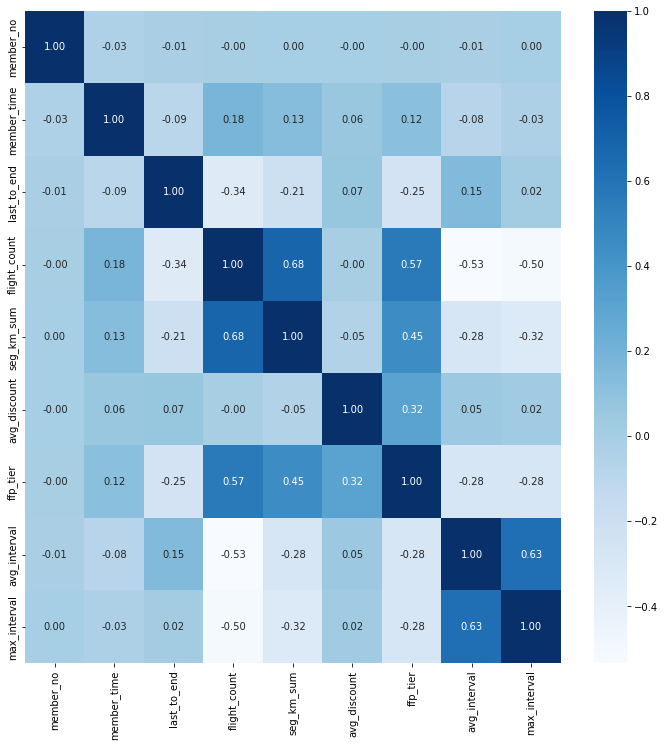

In [28]:
sns.heatmap(df_new.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Delete outliers

In [29]:
df_no_outliers = df_new.copy()

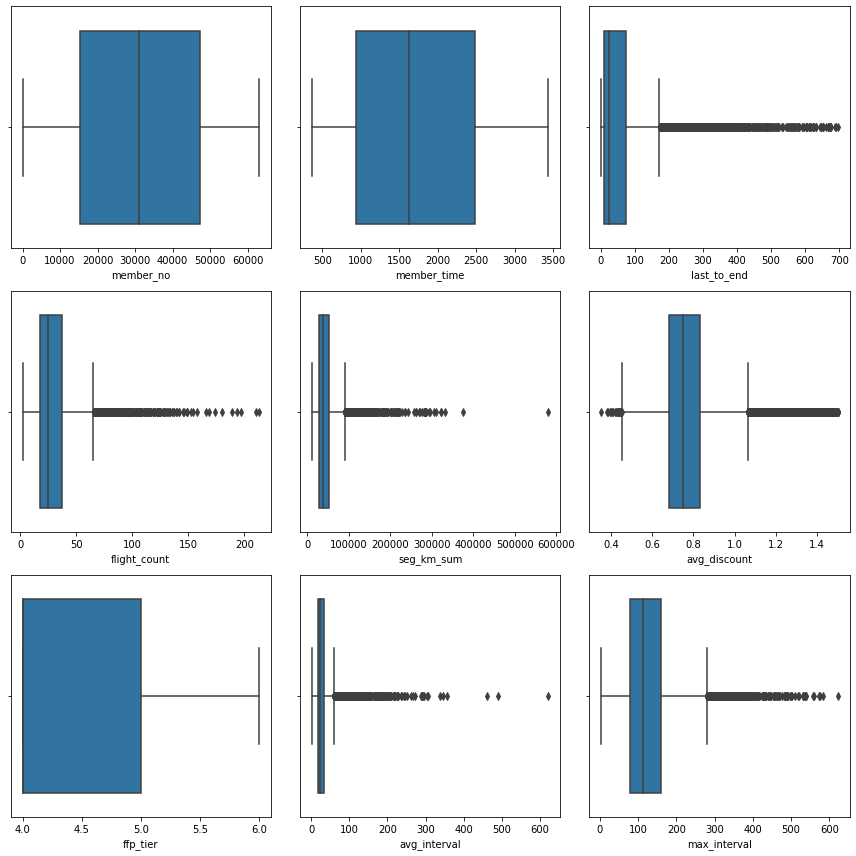

In [30]:
#Sebelum penghapusan outliers

for i in range(0, len(df_no_outliers.columns)):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=df_no_outliers[df_no_outliers.columns[i]])
  plt.tight_layout()

In [31]:
import scipy.stats as st
outliers = ['last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount']

for i in outliers:
  z_scores = np.abs(st.zscore(df_no_outliers[i]))
  filtered_entries = (z_scores < 3)
  df_no_outliers = df_no_outliers[filtered_entries]
df_no_outliers.shape

(12693, 9)

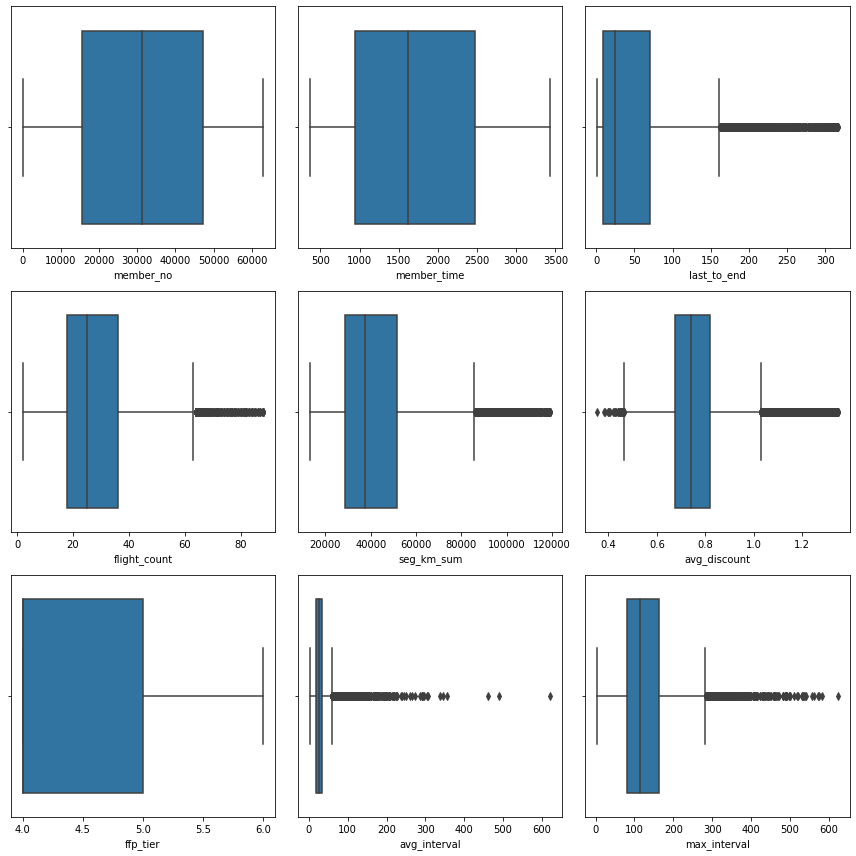

In [32]:
#Setelah penghapusan outliers

for i in range(0, len(df_no_outliers.columns)):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=df_no_outliers[df_no_outliers.columns[i]])
  plt.tight_layout()

## Dimensional Reduction

In [33]:
df_reduction = df_no_outliers.reset_index(drop=True).copy()
df_reduction

,member_no,member_time,last_to_end,flight_count,seg_km_sum,avg_discount,ffp_tier,avg_interval,max_interval
0,38290,3111,11.000000,69,118726,1.297050,6,10.573529,46.000000
1,6088,868,24.000000,65,109089,1.318944,5,10.781250,59.000000
2,26960,2907,1.000000,45,116917,1.154156,5,16.409091,52.000000
3,43627,1555,15.000000,80,105118,1.277943,6,8.873418,45.000000
4,37021,2653,6.000000,82,106666,1.255921,6,8.802469,54.000000
...,...,...,...,...,...,...,...,...,...
12688,35461,3080,228.000000,23,28761,0.586399,4,22.454545,109.000000
12689,29885,2258,4.000000,24,17667,0.954627,4,28.260870,158.000000
12690,10185,2483,70.000000,18,25096,0.671860,4,38.294118,167.000000
12691,31670,1396,134.000000,8,25571,0.659366,4,27.142857,74.000000


In [34]:
#Dimension reduction 1
# Merubah 'member_time', 'last_to_end','avg_interval', 'max_interval' menjadi 'recency'.

from sklearn.decomposition import PCA
reduc1 = df_reduction[['member_time', 'last_to_end','avg_interval', 'max_interval']]
pca = PCA(n_components=1)

pca.fit(reduc1)
pcs1 = pca.transform(reduc1)

data_pca1 = pd.DataFrame(data = pcs1, columns = ['recency'])
df_pca1 = df_reduction.join(data_pca1)

pca.explained_variance_ratio_

array([0.98816967])

**98% informasi masih tersimpan menggunakan PCA.**

In [35]:
#Dimension reduction 2
#Merubah 'seg_km_sum', 'avg_discount', 'ffp_tier' menjadi 'monetary'.

reduc2 = df_reduction[['seg_km_sum', 'avg_discount', 'ffp_tier']]
pca = PCA(n_components=1)

pca.fit(reduc2)
pcs2 = pca.transform(reduc2)

data_pca2 = pd.DataFrame(data = pcs2, columns = ['monetary'])
df_pca2 = df_pca1.join(data_pca2)

pca.explained_variance_ratio_

array([1.])

**100% informasi tersimpan menggunakan PCA**

In [36]:
#Drop kolom yang direduksi
df_pca = df_pca2.drop(columns=['member_time', 'last_to_end', 'seg_km_sum', 'avg_discount'])

#Merubah kolom 'flight count' menjadi 'frequency'
df_pca.rename(columns={'flight_count':'frequency'}, inplace=True)

#Merapihkan dataframe RFM
df_pca = df_pca[['member_no', 'recency', 'frequency', 'monetary']]
df_pca

,member_no,recency,frequency,monetary
0,38290,1388.385746,69,75942.270320
1,6088,-854.662289,65,66305.270309
2,26960,1184.404474,45,74133.270309
3,43627,-167.608200,80,62334.270321
4,37021,930.399493,82,63882.270321
...,...,...,...,...
12688,35461,1356.434879,23,-14022.729696
12689,29885,535.199319,24,-25116.729696
12690,10185,759.912318,18,-17687.729696
12691,31670,-327.141530,8,-17212.729696


In [37]:
df_pca.describe()

,member_no,recency,frequency,monetary
count,12693.000000,1.269300e+04,12693.000000,1.269300e+04
mean,31391.951548,-1.435394e-13,28.678721,2.410931e-11
std,18193.697189,8.706581e+02,15.492248,1.940074e+04
min,2.000000,-1.358282e+03,2.000000,-2.962273e+04
25%,15396.000000,-7.877175e+02,18.000000,-1.417073e+04
50%,31266.000000,-1.068899e+02,25.000000,-5.512730e+03
75%,47195.000000,7.473387e+02,36.000000,8.718270e+03
max,62988.000000,1.714249e+03,88.000000,7.656327e+04


## Normalisasi Data

In [38]:
df_norm = df_pca.copy()

In [39]:
normalize = ['recency', 'frequency', 'monetary']

from sklearn.preprocessing import StandardScaler
df_norm[normalize] = StandardScaler().fit_transform(df_norm[normalize])

df_norm

,member_no,recency,frequency,monetary
0,38290,1.594702,2.602777,3.914554
1,6088,-0.981667,2.344573,3.417801
2,26960,1.360409,1.053554,3.821307
3,43627,-0.192515,3.312838,3.213110
4,37021,1.068659,3.441939,3.292904
...,...,...,...,...
12688,35461,1.558004,-0.366567,-0.722822
12689,29885,0.614731,-0.302016,-1.294678
12690,10185,0.872837,-0.689322,-0.911740
12691,31670,-0.375755,-1.334831,-0.887255


In [40]:
df_norm.describe()

,member_no,recency,frequency,monetary
count,12693.000000,1.269300e+04,1.269300e+04,1.269300e+04
mean,31391.951548,-1.824219e-16,1.530329e-15,1.990040e-15
std,18193.697189,1.000039e+00,1.000039e+00,1.000039e+00
min,2.000000,-1.560126e+00,-1.722137e+00,-1.526947e+00
25%,15396.000000,-9.047737e-01,-6.893216e-01,-7.304508e-01
50%,31266.000000,-1.227740e-01,-2.374649e-01,-2.841616e-01
75%,47195.000000,8.583945e-01,4.725956e-01,4.493959e-01
max,62988.000000,1.968989e+00,3.829245e+00,3.946565e+00


# Clustering

## n Clusters

In [41]:
df_model = df_norm.drop(columns=('member_no'))

In [42]:
# Mencari jumlah n cluster terbaik menggunakan elbow method 

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df_model) 
    kmeanModel.fit(df_model)     
      
    distortions.append(sum(np.min(cdist(df_model, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_model.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df_model, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df_model.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

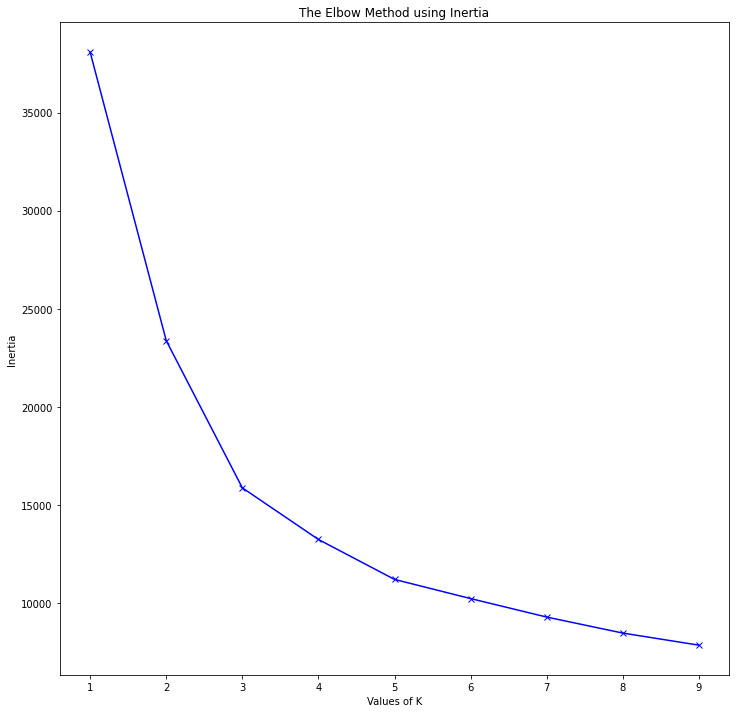

In [43]:
# Ploting

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [44]:
idf = pd.DataFrame(inertias)
(idf - idf.shift(-1)) / idf * 100

,0
0,38.588812
1,32.070771
2,16.559253
3,15.348559
4,8.706290
5,9.188052
6,8.770350
7,7.246700
8,NaN


**Jumlah cluster yang optimum ada di antara 4 dan 5 karena setelahnya penurunan nilainya sudah tidak signifikan.**

## Modeling

In [46]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(df_model)

In [47]:
rfm = df_model.copy()
rfm['segment'] = kmeans5.labels_
rfm

,recency,frequency,monetary,segment
0,1.594702,2.602777,3.914554,3
1,-0.981667,2.344573,3.417801,3
2,1.360409,1.053554,3.821307,3
3,-0.192515,3.312838,3.213110,3
4,1.068659,3.441939,3.292904,3
...,...,...,...,...
12688,1.558004,-0.366567,-0.722822,0
12689,0.614731,-0.302016,-1.294678,0
12690,0.872837,-0.689322,-0.911740,0
12691,-0.375755,-1.334831,-0.887255,2


## Visualize Model

### Static Viz

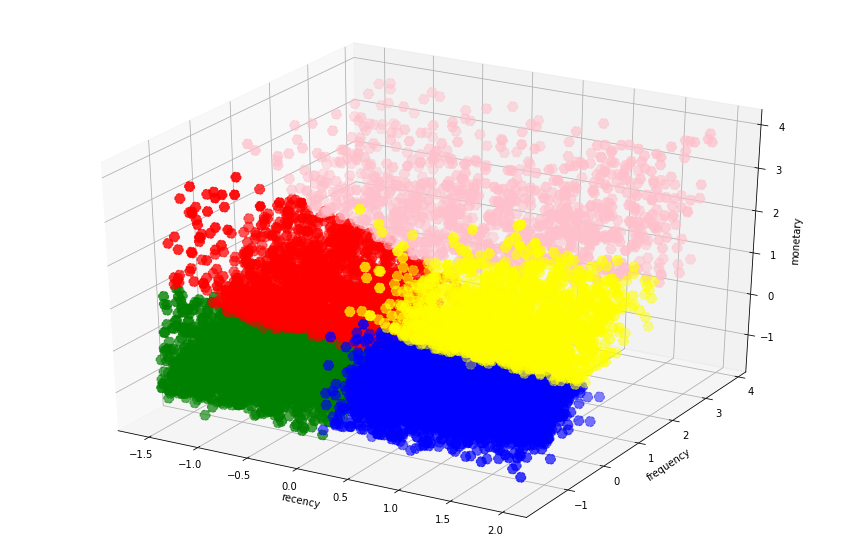

In [51]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['recency'][rfm.segment == 0], rfm["frequency"][rfm.segment == 0], rfm["monetary"][rfm.segment == 0], c='blue', s=100, edgecolor='blue',linestyle='--')
ax.scatter(rfm['recency'][rfm.segment == 1], rfm["frequency"][rfm.segment == 1], rfm["monetary"][rfm.segment == 1], c='red', s=100, edgecolor='red',linestyle='--')
ax.scatter(rfm['recency'][rfm.segment == 2], rfm["frequency"][rfm.segment == 2], rfm["monetary"][rfm.segment == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(rfm['recency'][rfm.segment == 3], rfm["frequency"][rfm.segment == 3], rfm["monetary"][rfm.segment == 3], c='pink', s=100, edgecolor='pink',linestyle='--')
ax.scatter(rfm['recency'][rfm.segment == 4], rfm["frequency"][rfm.segment == 4], rfm["monetary"][rfm.segment == 4], c='yellow', s=100, edgecolor='yellow',linestyle='--')


plt.xlabel('recency')
plt.ylabel("frequency")
ax.set_zlabel('monetary')
plt.show()

### Interactive Viz

In [52]:
import plotly.express as px
df_3d = rfm
fig = px.scatter_3d(df_3d, x='recency', y='frequency', z='monetary',
              color='segment')
fig.show()

# Insight

## New Dataset

In [55]:
segment_member = df_norm.merge(rfm,
                               on = ['recency', 'frequency', 'monetary'],
                               how ='outer')
segment_member.drop(columns=(['recency', 'frequency', 'monetary']), inplace=True)
segment_member.drop_duplicates(inplace=True)
segment_member

,member_no,segment
0,38290,3
1,6088,3
2,26960,3
3,43627,3
4,37021,3
...,...,...
12694,35461,0
12695,29885,0
12696,10185,0
12697,31670,2


In [59]:
#Menggabungkan dataset
airline_segment = df_clean.merge(segment_member,
                               on ='member_no',
                               how ='outer')
airline_segment['segment'] = airline_segment['segment'].fillna(5)
airline_segment

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,member_time,segment
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31 00:00:00.000000000,1.000000,3.483254,18.000000,34.000000,0.961639,619760.000000,50.000000,2706,5.0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25 00:00:00.000000000,7.000000,5.194245,17.000000,29.000000,1.252314,415768.000000,33.000000,2597,5.0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21 00:00:00.000000000,11.000000,5.298507,18.000000,20.000000,1.254676,406361.000000,26.000000,2615,5.0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26 00:00:00.000000000,97.000000,27.863636,73.000000,11.000000,1.090870,372204.000000,12.000000,2047,5.0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27 00:00:00.000000000,5.000000,4.788079,47.000000,27.000000,0.970658,338813.000000,39.000000,1816,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14016,35461,2005-10-24,2005-10-25,Male,4,shenyang,liaoningsheng,CN,57,2014-03-31,23,11775,14845.0,1554.0,28761,2013-08-17 00:00:00.000000000,228.000000,22.454545,109.000000,0.000000,0.586399,11775.000000,0.000000,3080,0.0
14017,29885,2008-01-24,2008-01-24,Male,4,guangzhou,guangdong,CN,41,2014-03-31,24,15970,8194.0,10337.0,17667,2014-03-28 00:00:00.000000000,4.000000,28.260870,158.000000,0.000000,0.954627,25799.000000,15.000000,2258,0.0
14018,10185,2007-06-13,2008-03-08,Male,4,MANILA,guangdong,PH,37,2014-03-31,18,15707,12050.0,3750.0,25096,2014-01-22 00:00:00.000000000,70.000000,38.294118,167.000000,0.000000,0.671860,15707.000000,0.000000,2483,0.0
14019,31670,2010-06-04,2010-06-04,Male,4,wulumuqi,xinjiang,CN,33,2014-03-31,8,10768,0.0,11791.0,25571,2013-11-19 00:00:00.000000000,134.000000,27.142857,74.000000,0.000000,0.659366,10768.000000,0.000000,1396,2.0


In [60]:
#Jumlah konsumen tiap segment
member_segmentation = airline_segment.groupby('segment').agg({'member_no':'count'}).reset_index()
member_segmentation

,segment,member_no
0,0.0,3415
1,1.0,2127
2,2.0,4386
3,3.0,1009
4,4.0,1756
5,5.0,1328


## Interpretasi Hasil

In [53]:
#Mencari rata-rata RFM tiap segment

def rfm_values(value):

    result = value.groupby('segment').agg({'recency':'mean',
                                'frequency': 'mean',
                                'monetary':'mean'}).reset_index(drop=True)
    result['no_segment'] = [0,1,2,3,4]
    result.rename(columns={'segment':'total'}, inplace=True)
    return result

rfm_analysis = rfm_values(rfm)
rfm_analysis

,recency,frequency,monetary,no_segment
0,0.902910,-0.503456,-0.571755,0
1,-0.739752,0.521153,0.565692,1
2,-0.849022,-0.614365,-0.593494,2
3,0.325192,2.209202,2.193136,3
4,1.073865,0.612946,0.648921,4


In [54]:
# Snake plot
rfm_values_melt = pd.melt(rfm_analysis, id_vars='no_segment', value_vars=['recency', 'frequency', 'monetary'])

import plotly.express as px
df_snake_plot = rfm_values_melt
fig = px.line(df_snake_plot, x='variable', y='value', color='no_segment', markers=True)
fig.show()


- **Segment 0 (Potential Churn/Low Value Customer)**: Konsumen sudah lama melakukan pembelian terakhir dengan frekuensi pembelian yang sedikit dan total nilai yang minim.

- **Segment 1 (Potential Customer)**: Waktu yang terjadi saat pembelian terakhir konsumen tidak lama dengan frekuensi dan total nilai yang sedang. 

- **Segment 2 (New Customer)**: Konsumen baru saja melakukan transaksi dengan frekuensi dan total nilai yang sedikit.

- **Segment 3 (High Value Customer)**: Konsumen melakukan pembelian terakhir tidak terlalu lama dengan frekuensi yang tinggi dan total nilai yang tinggi juga.

- **Segment 4 (General Customer)**: Konsumen sudah lama melakukan pembelian terakhir dengan frekuensi pembelian dan total nilai yang sedang.

- **Segment 5 (Outlier)**: Perlu dilakukan analisis lebih lanjut kepada konsumen dengan segmen ini.


## Rekomendasi

**Segment 0: Potentital Churn/Low Value Customer**

Memberikan personalisasi marketing campaign terkait dengan produk/tiket penerbangan yang sama pada saat terakhir kali konsumen bertransaksi.

**Segment 1: Potential Customer**

Memberikan informasi loyalty program kepada konsumen jenis ini. Dengan total nilai dan frekuensi pembelian yang sedang, konsumen segmen ini cocok untuk diberikan program diskon serta informasi benefit lainnya agar konsumen ini tetap loyal kepada perusahaan.

**Segment 2: New Customer**

First impression merupakan hal yang penting bagi konsumen baru. Memberikan email welcome offer, tips menggunakan produk-produk penerbangan dan informasi yang membantu bagi konsumen baru merupakan beberapa langkah yang bisa dilakukan.

**Segment 3 : High Value Customer**

Fokus untuk memberikan informasi produk baru dan loyalty program secara berkala. Karena konsumen ini memiliki kebiasaan membeli dengan frekuensi serta nilai yang tinggi, maka tidak perlu diberikan diskon yang tinggi. Tetapi lebih berfokus kepada pemberian informasi terkait produk premium dan produk baru dari perusahaan.

**Segment 4: General Customer**

Fokus dalam meyakinkan konsumen untuk melakukan pembelian produk lagi. Dengan waktu pembelian terakhir yang cukup lama, marketing campaign berupa follow up email, penawaran baru, dan berbagai diskon merupakan langkah yang bisa dilakukan untuk menargetkan konsumen ini.